In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.	Understand the dataset:
a.	Identify the shape of the dataset

b.	Identify variables with null values

c.	Identify variables with unique values

In [3]:
df=pd.read_csv('PEP1.csv',index_col=0)

a. Identify the shape of the dataset

In [4]:
df.shape

(1460, 80)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

b.	Identify variables with null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [9]:
print((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False).head(15))
remove_features=['PoolQC','MiscFeature','Alley','Fence']

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
dtype: float64


c. Identify variables with unique values

In [10]:
unique_values=df.nunique().reset_index().sort_values(by=0,ascending=False)

In [11]:
unique_values

,index,0
3,LotArea,1073
45,GrLivArea,861
36,BsmtUnfSF,780
42,1stFlrSF,753
37,TotalBsmtSF,721
...,...,...
64,PavedDrive,3
4,Street,2
5,Alley,2
8,Utilities,2


In [12]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [13]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


LotArea
[ 8450  9600 11250 ... 17217 13175  9717]


Street
['Pave' 'Grvl']


Alley
[nan 'Grvl' 'Pave']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa']


LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope
['Gtl' 'Mod' 'Sev']


Neig

# 2.	Generate a separate dataset for numerical and categorical variables

In [14]:
numerical_variables=df.select_dtypes(include=[np.number])
categorical_variables=df.select_dtypes(exclude=[np.number])

In [15]:
numerical_variables.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


# 3.	EDA of numerical variables:
a.	Missing value treatment

b.	Identify the skewness and distribution

c.	Identify significant variables using a correlation matrix 

d.	Pair plot for distribution and density


# a. Missing value treatment

In [16]:
mis_val =numerical_variables.isna().sum()
mis_val_per = numerical_variables.isna().sum()/len(numerical_variables)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
LotFrontage,259.0,17.7
GarageYrBlt,81.0,5.5
MasVnrArea,8.0,0.5
MSSubClass,NaN,NaN
LotArea,NaN,NaN
OverallQual,NaN,NaN
OverallCond,NaN,NaN
YearBuilt,NaN,NaN
YearRemodAdd,NaN,NaN
BsmtFinSF1,NaN,NaN


In [18]:
numerical_variables.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [19]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

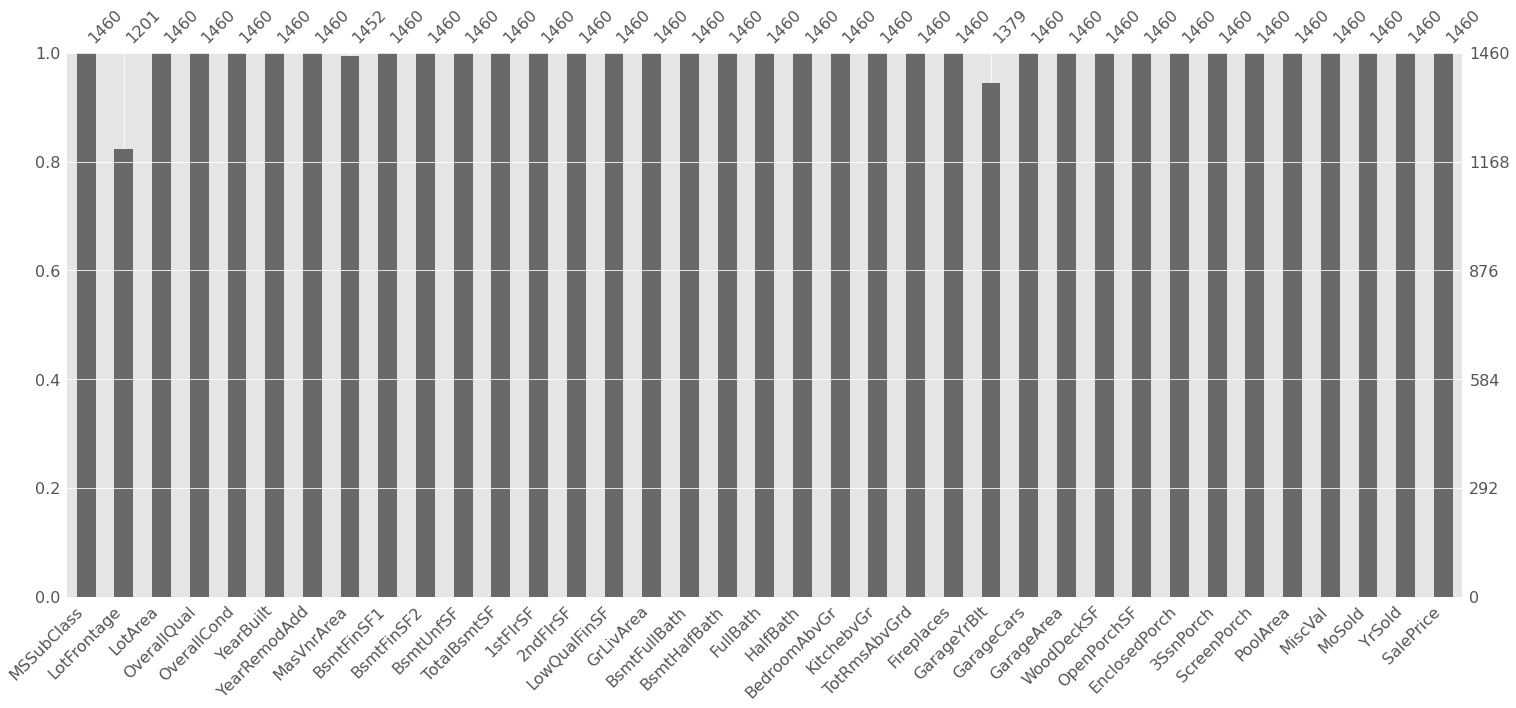

In [21]:
from matplotlib import style
style.use('ggplot')
import missingno as msno
msno.bar(numerical_variables)

<AxesSubplot:>

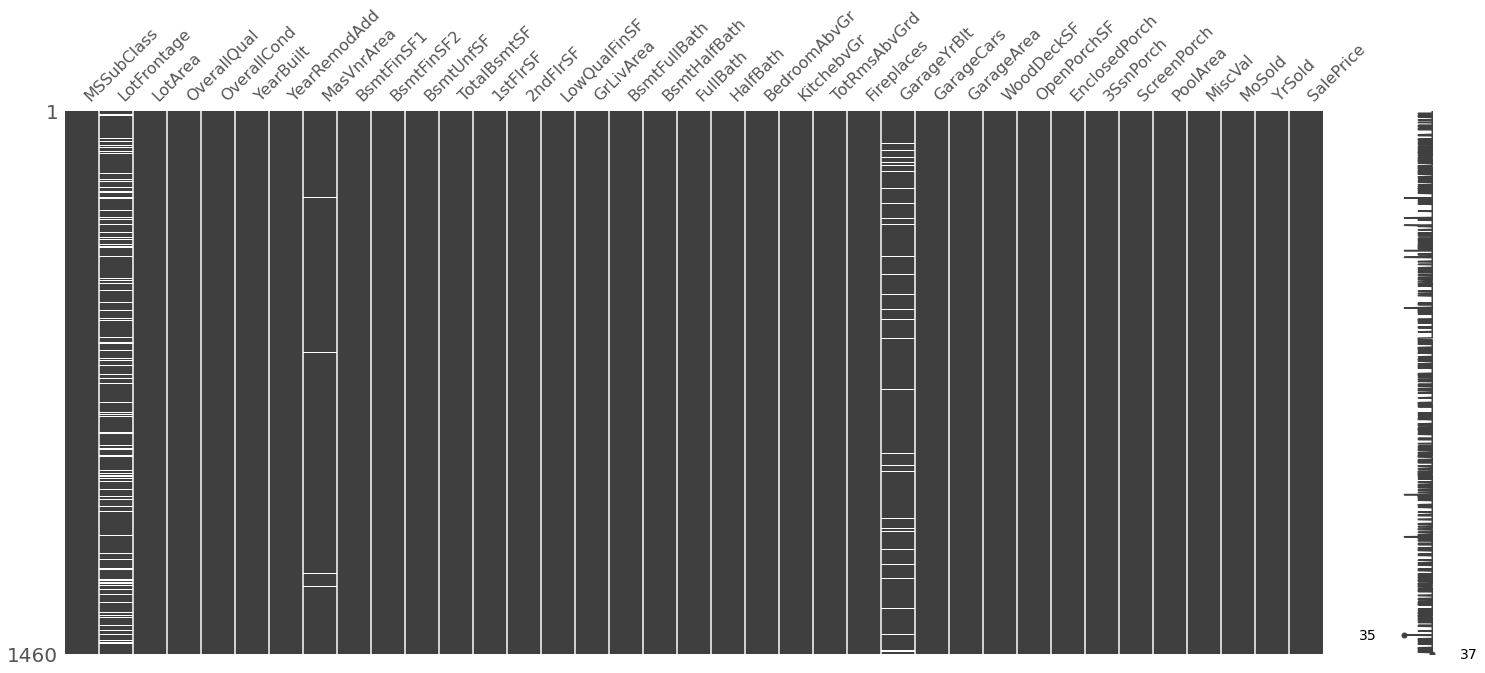

In [23]:
msno.matrix(numerical_variables)

<AxesSubplot:>

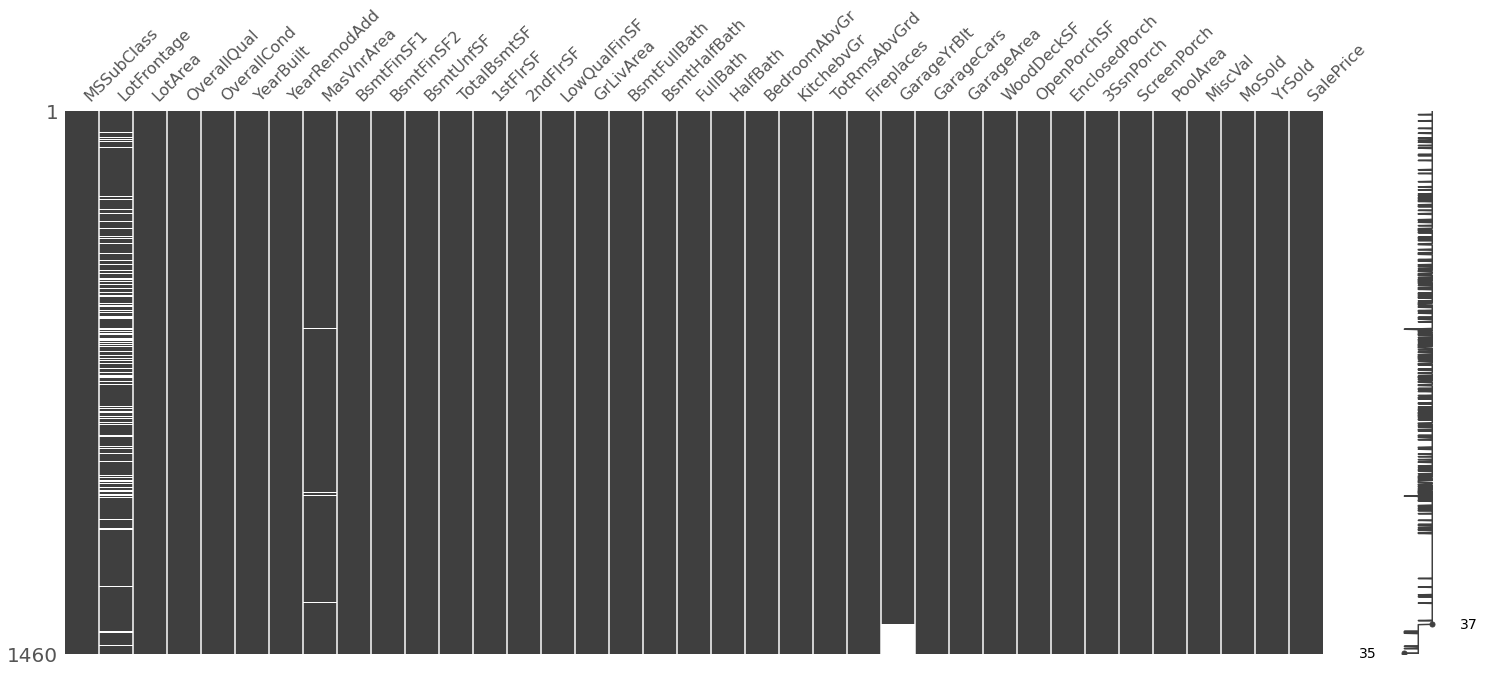

In [25]:
sorted = numerical_variables.sort_values('GarageYrBlt')
msno.matrix(sorted)

<AxesSubplot:>

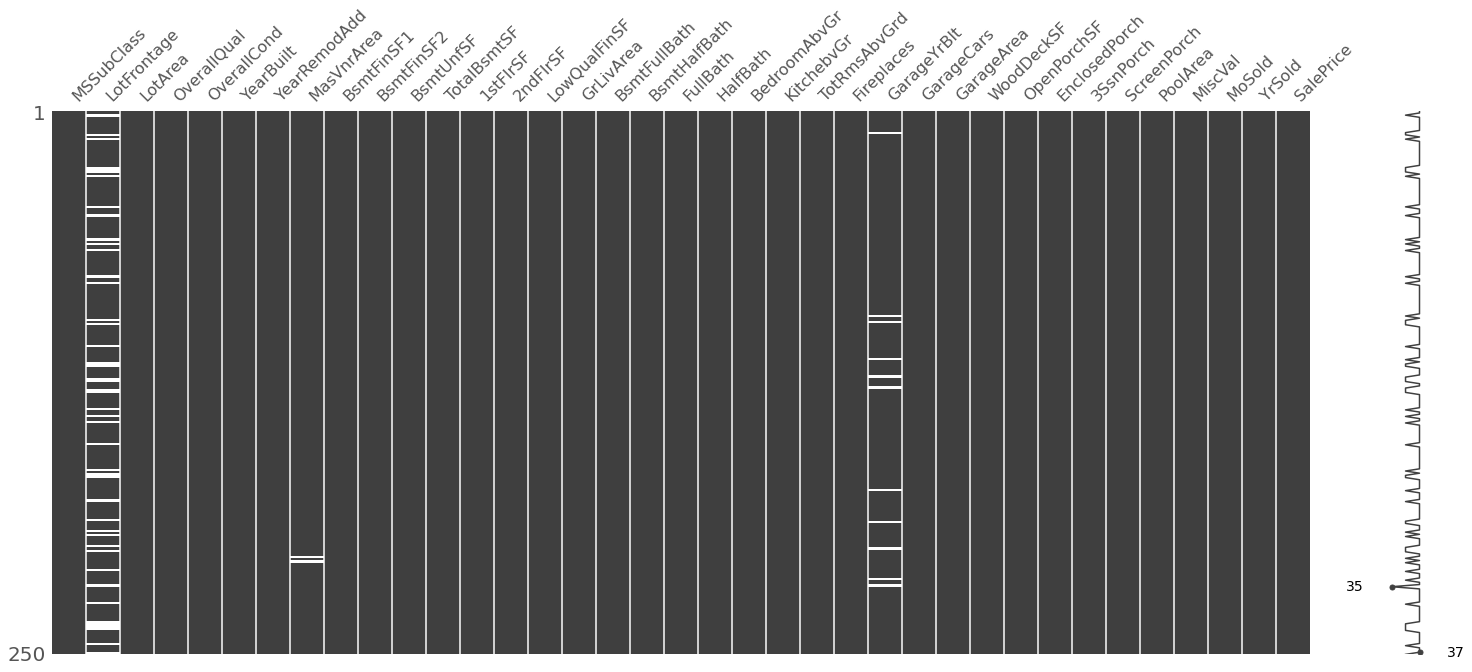

In [27]:
msno.matrix(numerical_variables.sample(250))

<AxesSubplot:>

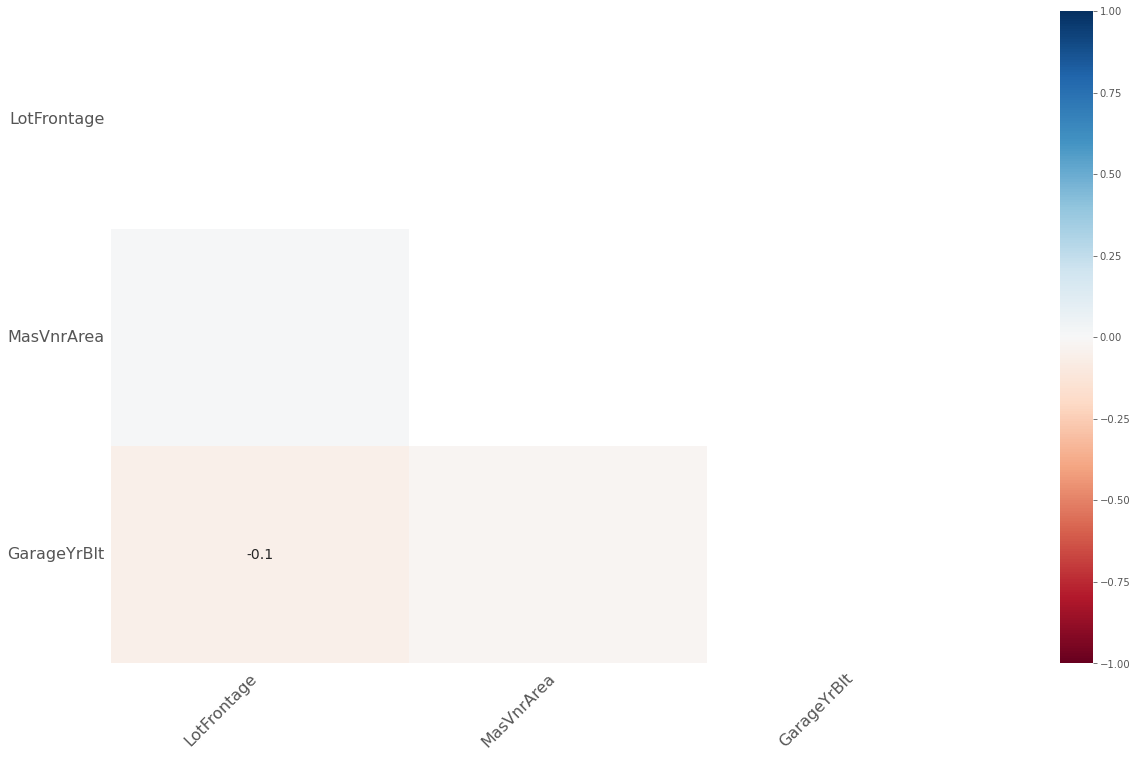

In [28]:
msno.heatmap(numerical_variables)

The heatmap function shows that there are no strong correlations between missing values of different features. low correlations further indicate that the data are MAR.

<AxesSubplot:>

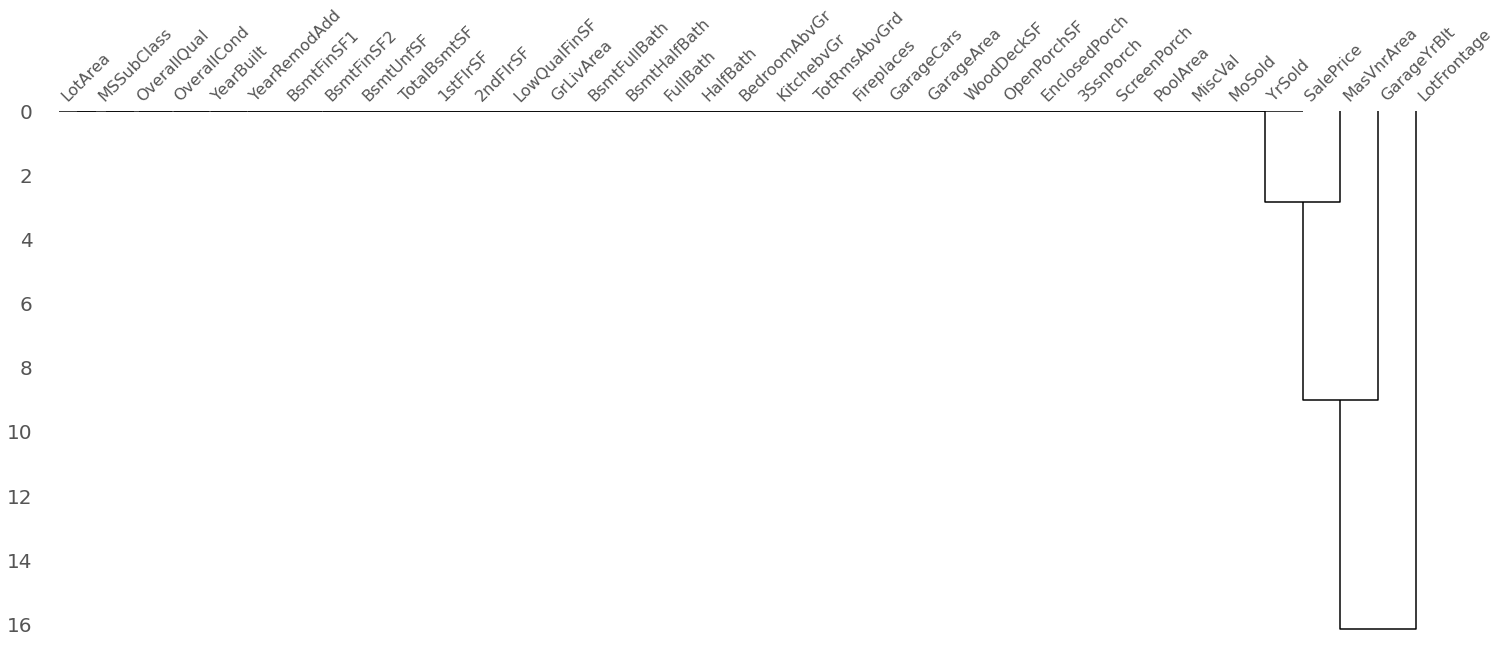

In [29]:
msno.dendrogram(numerical_variables)

Missing values are MAR type(Missing at random) as corelation is low

In [36]:
numerical_variables.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

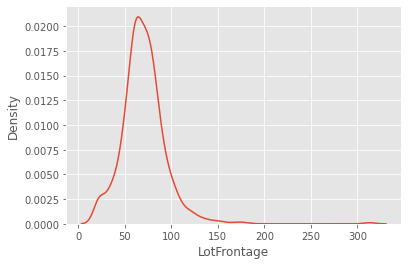

In [41]:
sns.distplot(numerical_variables['LotFrontage'],bins=10,hist=False)

In [45]:
numerical_variables.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [46]:
def plotting(col):
    sns.boxplot(x=col,data=numerical_variables)
    plt.title('Boxplot for'+col)
    print('No of missing values: ')
    print(numerical_variables[col].isnull().sum())


No of missing values: 
259


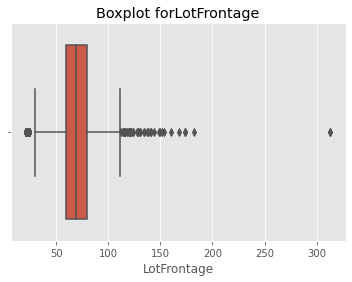

In [49]:
plotting('LotFrontage')

In [54]:
numerical_variables['LotFrontage'].fillna((numerical_variables['LotFrontage'].mean()),inplace=True)

In [56]:
numerical_variables['LotFrontage'].isnull().sum()

0

No of missing values: 
81


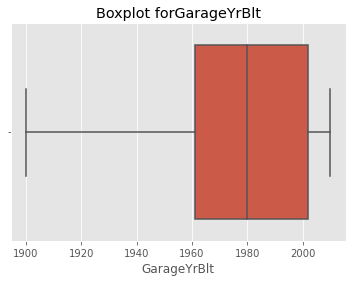

In [57]:
plotting('GarageYrBlt')

In [58]:
numerical_variables['GarageYrBlt'].mean()

1978.5061638868744

In [59]:
numerical_variables['GarageYrBlt'].fillna((numerical_variables['GarageYrBlt'].mean()),inplace=True)

In [60]:
numerical_variables['MasVnrArea']

Id
1       196.0
2         0.0
3       162.0
4         0.0
5       350.0
        ...  
1456      0.0
1457    119.0
1458      0.0
1459      0.0
1460      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

No of missing values: 
8


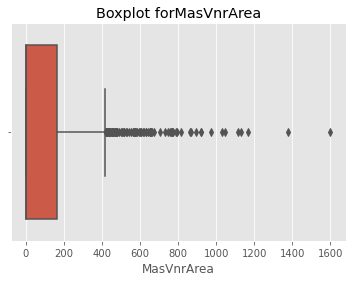

In [61]:
plotting('MasVnrArea')

In [62]:
numerical_variables['MasVnrArea'].fillna((numerical_variables['MasVnrArea'].mode()),inplace=True)

In [63]:
numerical_variables.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# b. Identify the skewness and distribution

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [64]:
skew_value=numerical_variables.skew(axis=1)

In [66]:
skew_value.describe()

count    1460.000000
mean        6.030704
std         0.096431
min         4.297929
25%         6.027926
50%         6.048803
75%         6.062977
max         6.079861
dtype: float64

The data is highly skewed as skew range from 4.2 to 6.07

In [73]:
skew_value_2=numerical_variables.skew(axis=0)

In [84]:
skew_value_2.sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchebvGr        4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
LotFrontage       2.384950
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.668175
d